分析:

1. 订单表的长度, shape, columns
2. 统计菜名的平均菜价(amounts)
3. 什么菜最受欢迎
4. 哪个订单ID点的菜最多

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # Set the font to SimHei
%matplotlib inline


# 1. Load Data
d1 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail1')
d2 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail2')
d3 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail3')

# 2. Data Preprocessing (merge, NA)
data = pd.concat([d1, d2, d3], axis=0)  # Merge data by rows
data.dropna(axis=1, inplace=True)  # Drop NA columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [2]:
# 统计卖出菜品的平均价格
import numpy as np
round(data['amounts'].mean(), 2)    # 方法一： pandas 自带函数
round(np.mean(data['amounts']), 2) # 方法二： numpy 函数处理, 数据多的情况下使用这人

44.82

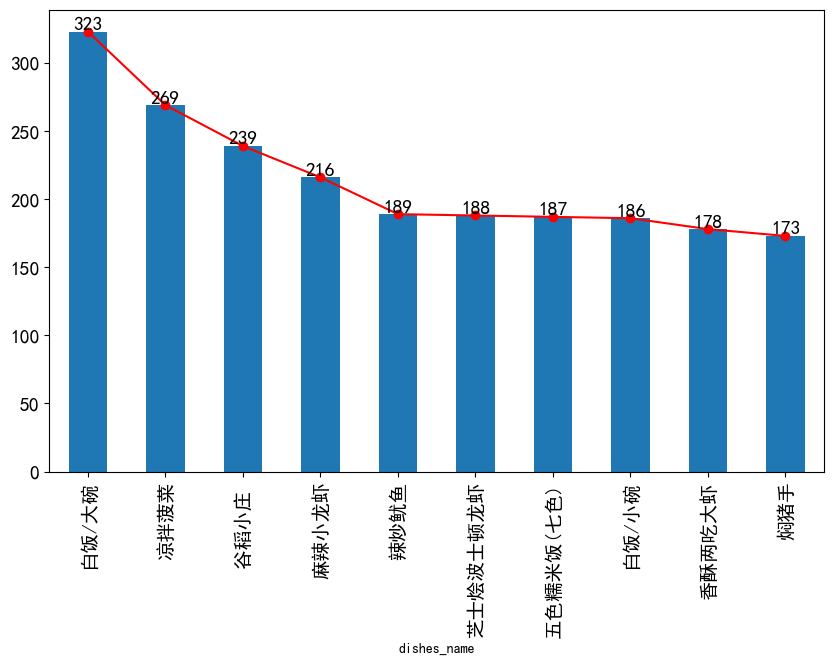

In [3]:
# 频数统计, 什么菜最欢迎 (对菜名进行统计, 取最大前10名)

import matplotlib.pyplot as plt
dishes_count = data['dishes_name'].value_counts()[:10]

# 3. Data Visualisation
plt.figure(figsize=(10, 6))
dishes_count.plot(kind='line', color='red', marker='o') 
dishes_count.plot(kind='bar', fontsize=14)


for a,b in enumerate(dishes_count):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=14)

'    \n 分析:    \n 8月份餐厅订单点菜种类前10名, 平均点菜25 个菜品\n'

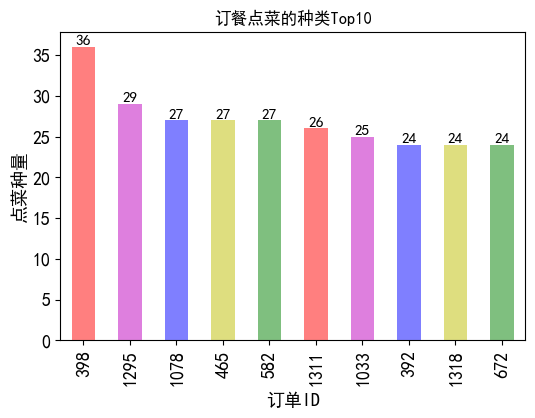

In [4]:
# 订单 点菜的种类最多
data_group = data['order_id'].value_counts()[:10]
data_group.plot(kind='bar', figsize=(6, 4), color=['r', 'm', 'b', 'y', 'g'], alpha=0.5, fontsize=13)
plt.title('订餐点菜的种类Top10')
plt.xlabel('订单ID', fontsize=13)
plt.ylabel('点菜种量', fontsize=13)
for a,b in enumerate(data_group):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)

'''    
 分析:    
 8月份餐厅订单点菜种类前10名, 平均点菜25 个菜品
'''

'\n 分析:    \n 8月份订单点菜数量前10名\n'

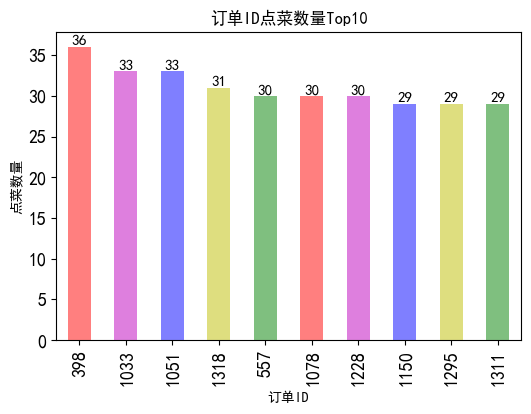

In [5]:
#  订单ID 点菜数量 Top10 (分组 order_id, counts 求和, 排序, 取前10)
data['total_amounts'] = data['counts'] * data['amounts']

dataGroup = data[['order_id', 'counts', 'amounts', 'total_amounts']].groupby('order_id')
Group_sum = dataGroup.sum()    # 分组求和
sort_counts = Group_sum.sort_values(by='counts', ascending=False)  # 排序
sort_counts['counts'][:10].plot(kind='bar', 
                                title='订单ID点菜数量Top10', 
                                figsize=(6, 4), 
                                color=['r', 'm', 'b', 'y', 'g'], 
                                alpha=0.5, 
                                fontsize=13)

for a,b in enumerate(sort_counts['counts'][:10]):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)

plt.xlabel('订单ID')
plt.ylabel('点菜数量')

'''
 分析:    
 8月份订单点菜数量前10名
'''

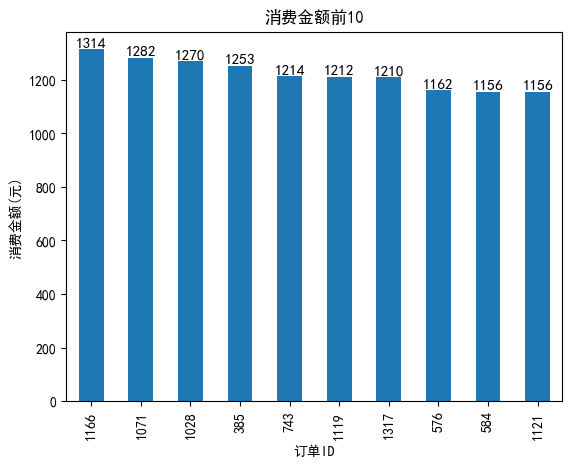

In [6]:
# 订单消费总额 Top10
data['total_amounts'] = data['counts'] * data['amounts']

dataGroup = data[['order_id', 'counts', 'amounts', 'total_amounts']].groupby('order_id')
Group_sum = dataGroup.sum()    # 分组求和
sort_total_amounts = Group_sum.sort_values(by='total_amounts', ascending=False)     # 排序

sort_total_amounts['total_amounts'][:10].plot(kind='bar', 
                                             title='消费金额前10')
plt.xlabel('订单ID')
plt.ylabel('消费金额(元)')

for a,b in enumerate(sort_total_amounts['total_amounts'][:10]):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)





Text(0.5, 1.0, '订单消费单价前10')

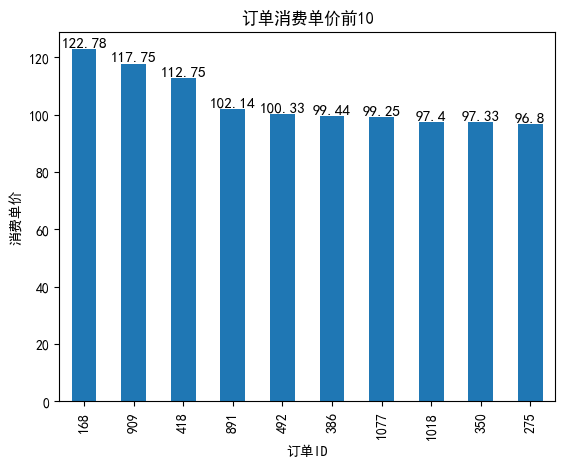

In [7]:
# 哪个订单 平均消费最贵

Group_sum['average'] = round(Group_sum['total_amounts']/Group_sum['counts'], 2)
sort_average = Group_sum.sort_values(by='average',ascending=False)

sort_average['average'][:10].plot(kind='bar')


for a,b in enumerate(sort_average['average'][:10]):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)

plt.xlabel('订单ID')
plt.ylabel('消费单价')
plt.title('订单消费单价前10')    

Text(0.5, 1.0, '下单数与小时的关系图')

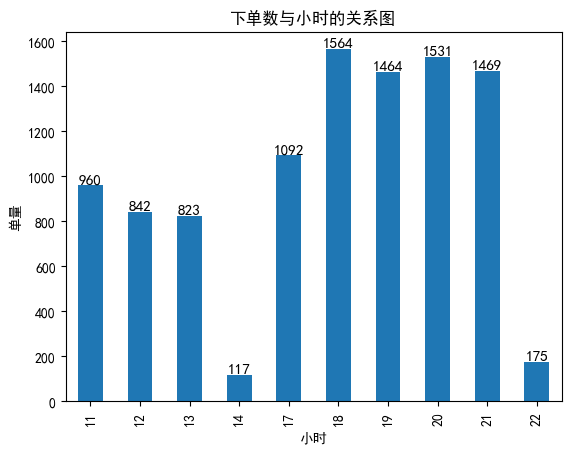

In [11]:
# 分析: 一天当中什么时间段, 点菜量比较集中 (hour)

data['hour_count'] = 1   # 新列, 用作计数器
data['time'] = pd.to_datetime(data['place_order_time'])    # 将时间转换成 日期类型存储

data['hour'] = data['time'].map(lambda x: x.hour)  # 获取时间的 小时    lambda 函数从每个 datetime 对象中提取 hour 组件
gp_by_hour = data.groupby('hour').count()['hour_count']  # 按照 hour 分组, 计数, 并且只显示 hour_count 这一列
gp_by_hour.plot(kind='bar')

for a,b in enumerate(gp_by_hour):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)

plt.xlabel('小时')
plt.ylabel('单量')
plt.title('下单数与小时的关系图')    

day
20    887
28    814
21    778
13    756
27    725
Name: day_count, dtype: int64


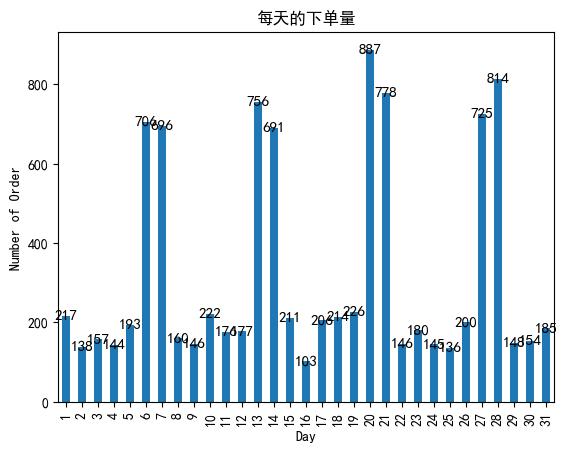

In [21]:
# 分析： 哪一天订餐数量最多

data['day_count'] = 1
data['day'] = data['time'].map(lambda x: x.day)
gp_by_day = data.groupby('day').count()['day_count']
gp_by_day.plot(kind='bar')

for a,b in enumerate(gp_by_day):
    plt.text(a, b, b, ha='center', va='center', fontsize=11)

plt.xlabel('Day')
plt.ylabel('Number of Order')
plt.title('每天的下单量')


# 拓展: 排序, 取点菜量最大的钱5天
top_5_day_count =gp_by_day.sort_values(ascending=False)[:5]
print(top_5_day_count)

Text(0, 0.5, 'Count')

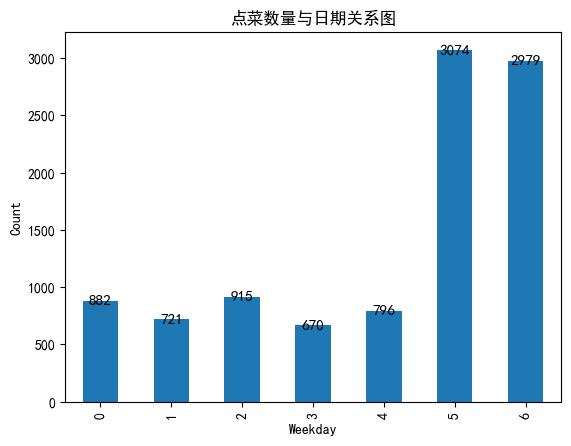

In [29]:
# 查看星期几人数最多， 订餐数最多， 映射数据到星期
# data['weekday'] = data['time'].dt.weekday
# data['weekday'] = data['time'].dt.dayofweek
data['week_count'] = 1
data['week_Day'] = data['time'].map(lambda x: x.weekday())
gp_by_weekday = data.groupby(['week_Day']).count()['week_count']
gp_by_weekday.plot(kind='bar', title='点菜数量与日期关系图')

for a,b in enumerate(gp_by_weekday):
    plt.text(a, b, b, ha='center', va='center', fontsize=11)

plt.xlabel('Weekday')
plt.ylabel('Count')



